<a href="https://colab.research.google.com/github/Yuliana2001/Entrega_final/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yulianaalzate","key":"e908c40352f267673894f240acc80057"}'}

# `1. Exploración de archivos`


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 12)


In [ ]:
z.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Secundaria (Bachillerato) completa,No,medio-alto
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Técnica o tecnológica completa,Si,alto
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,medio-bajo
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Educación profesional incompleta,Si,medio-bajo
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Postgrado,Si,alto


In [ ]:
z = z[['FAMI_EDUCACIONMADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
z.head(8)

,FAMI_EDUCACIONMADRE,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,Postgrado,Entre 5.5 millones y menos de 7 millones,medio-alto
1,Técnica o tecnológica incompleta,Entre 2.5 millones y menos de 4 millones,bajo
2,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,bajo
3,Secundaria (Bachillerato) completa,Entre 4 millones y menos de 5.5 millones,alto
4,Primaria completa,Entre 2.5 millones y menos de 4 millones,medio-bajo
5,Secundaria (Bachillerato) completa,Más de 7 millones,medio-alto
6,Técnica o tecnológica completa,Entre 2.5 millones y menos de 4 millones,alto
7,Secundaria (Bachillerato) incompleta,Entre 1 millón y menos de 2.5 millones,medio-bajo


<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

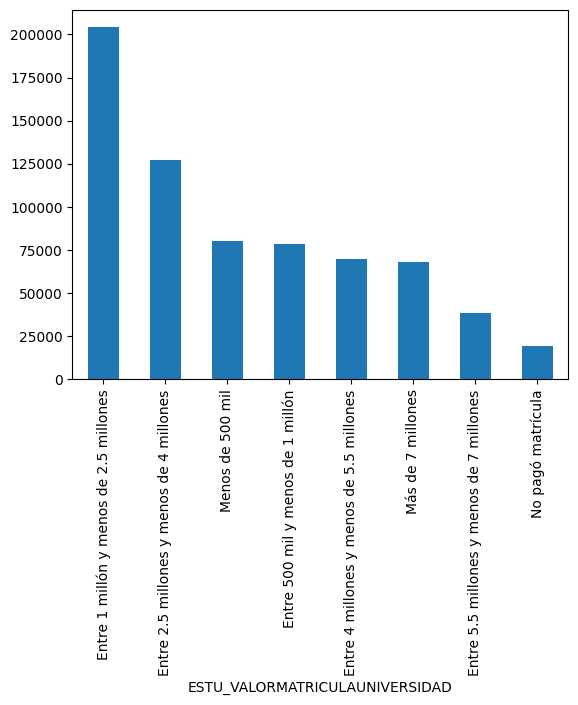

In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

In [ ]:
print("Número de estudiantes: "+str(z.shape[0]))

Número de estudiantes: 692500


In [ ]:
x=53244+51902+39664+31932+28481
print(x)

205223


# 2. Preprocesamiento

In [ ]:
sum(z.FAMI_EDUCACIONPADRE.isna()), sum(z.ESTU_VALORMATRICULAUNIVERSIDAD.isna())


(23178, 6287)

In [ ]:
z.FAMI_EDUCACIONMADRE.values[z.FAMI_EDUCACIONMADRE.isna()] = 'no info'
z.FAMI_EDUCACIONPADRE.values[z.FAMI_EDUCACIONPADRE.isna()] = 'no info'
z.ESTU_VALORMATRICULAUNIVERSIDAD.values[z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
z.ESTU_HORASSEMANATRABAJA.values[z.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
z.FAMI_TIENEINTERNET.values[z.FAMI_TIENEINTERNET.isna()] = 'no info'
z.ESTU_PAGOMATRICULAPROPIO.values[z.ESTU_PAGOMATRICULAPROPIO.isna()] = 'no info'
z.ESTU_HORASSEMANATRABAJA.values[z.ESTU_HORASSEMANATRABAJA.isna()] = '0'
sum(z.FAMI_EDUCACIONMADRE.isna()), sum(z.ESTU_VALORMATRICULAUNIVERSIDAD.isna())

(0, 0)

In [ ]:
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

z.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in z.ESTU_VALORMATRICULAUNIVERSIDAD]]
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


In [ ]:
z = z.copy()
z.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.FAMI_EDUCACIONMADRE.values]

In [ ]:
z.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
no info,28599
Técnica o tecnológica incompleta,27533


In [ ]:
y_col_horas_trabajo = 'ESTU_PRGM_ACADEMICO'
z[y_col_horas_trabajo] = z[y_col_horas_trabajo].replace(
    ['Comunicacion Social  - Periodismo', 'Comunicacion Social -  Periodismo', 'Comunicacion Social - Periodismo', 'Comunicacion Social Periodismo', 'Comunicacion Social Y Periodismo', 'Comunicacion Social- Periodismo',  'Comunicacion Social-Periodismo', 'Comunicacion Socialy Periodismo',  'Profesional En Comunicacion Social - Periodismo'],
    'Comunicacion Social     Y     Periodismo'
)

# Reemplaza los valores en la columna
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,3.25,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
y_col_pro= 'ESTU_PRGM_ACADEMICO'
z[y_col_pro] = z[y_col_pro].replace(
    ['Administracion En Salud: Enfasis En Gestion De Servicios De Salud Y  Enfasis En Gestion Sanitaria Y Ambiental', 'Administración En Salud'],
    'Administración En Salud Ocupacional'
)

In [ ]:
import numpy as np

# Definimos las variables
variables = {
    'FAMI_EDUCACIONMADRE': z.FAMI_EDUCACIONMADRE.values,
    'FAMI_EDUCACIONPADRE': z.FAMI_EDUCACIONPADRE.values,
    'ESTU_PRGM_ACADEMICO': z.ESTU_PRGM_ACADEMICO.values,
    'ESTU_PRGM_DEPARTAMENTO': z.ESTU_PRGM_DEPARTAMENTO.values,
    'FAMI_TIENEINTERNET': z.FAMI_TIENEINTERNET.values,
    'FAMI_ESTRATOVIVIENDA': z.FAMI_ESTRATOVIVIENDA.values,
}

# Diccionario para almacenar los valores one-hot
onehot_encodings = {}

# Aplicamos one-hot encoding para cada variable
for var_name, values in variables.items():
    unique_vals = sorted(np.unique(values))
    onehot_encodings[var_name] = {
        val: np.eye(len(unique_vals))[i] for i, val in enumerate(unique_vals)
    }



In [ ]:
FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[onehot_encodings['FAMI_EDUCACIONPADRE'][i] for i in z.FAMI_EDUCACIONPADRE]]

FAMI_EDUCACIONMADRE_onehot_enc

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in onehot_encodings['FAMI_EDUCACIONPADRE']['Primaria incompleta']])
FAMI_EDUCACIONPADRE_df

,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__1.0,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__0.0,FAMI_EDUCACIONMADRE__0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = [rmap[i] for i in z[y_col]]
z.head()

KeyError: 2

In [ ]:
y_col_horas_trabajo = 'ESTU_HORASSEMANATRABAJA'
rmapHoras = {
    "Menos de 10 horas": 1,
    "Entre 11 y 20 horas": 2,
    "Entre 21 y 30 horas": 3,
    "Más de 30 horas": 4,
    "0":0,
    "no info":0
}
z[y_col_horas_trabajo] = [rmapHoras[i] for i in z[y_col_horas_trabajo]]
# Reemplaza los valores en la columna
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,1,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,DERECHO,ATLANTICO,3.25,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,4,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,3,Estrato 3,Si,Primaria completa,Primaria completa,No,1


In [ ]:
#PARA FAMI_TIENEINTERNET
y_col_rendimiento = 'FAMI_TIENEINTERNET'
rmapRendi = {'no info':0,'Si': 1, 'No':2}
z[y_col_rendimiento] = [rmapRendi[i] for i in z[y_col_rendimiento]]
rmapEst = {'no info':0,'Sin Estrato':0,'Estrato 1': 1, 'Estrato 2':2, 'Estrato 3':3, 'Estrato 4':4, 'Estrato 5':5, 'Estrato 6':6}
z['FAMI_ESTRATOVIVIENDA'] = [rmapEst[i] for i in z['FAMI_ESTRATOVIVIENDA']]
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,1,3,1,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,DERECHO,ATLANTICO,3.25,0,3,2,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,4,3,1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,4,1,No sabe,Secundaria (Bachillerato) completa,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,3,3,1,Primaria completa,Primaria completa,No,1


In [ ]:
y_col_programa = 'ESTU_PRGM_ACADEMICO'
z[y_col_programa]=[i.title() for i in z[y_col_programa]]

y_col_departamento = 'ESTU_PRGM_DEPARTAMENTO'
z[y_col_departamento]=[i.title() for i in z[y_col_departamento]]
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,Enfermeria,Bogotá,6.25,1,3,1,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,Derecho,Atlantico,3.25,0,3,2,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,Mercadeo Y Publicidad,Bogotá,3.25,4,3,1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,Administracion De Empresas,Santander,4.75,0,4,1,No sabe,Secundaria (Bachillerato) completa,No,3
4,989032,20212,Psicologia,Antioquia,3.25,3,3,1,Primaria completa,Primaria completa,No,1


In [ ]:
y_col_propio = 'ESTU_PAGOMATRICULAPROPIO'
rmapPropio = {'no info':0,'Si': 1, 'No':2}
z[y_col_propio] = [rmapPropio[i] for i in z[y_col_propio]]
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,Enfermeria,Bogotá,6.25,1,3,1,Técnica o tecnológica incompleta,Postgrado,2,2
1,645256,20212,Derecho,Atlantico,3.25,0,3,2,Técnica o tecnológica completa,Técnica o tecnológica incompleta,2,0
2,308367,20203,Mercadeo Y Publicidad,Bogotá,3.25,4,3,1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,2,0
3,470353,20195,Administracion De Empresas,Santander,4.75,0,4,1,No sabe,Secundaria (Bachillerato) completa,2,3
4,989032,20212,Psicologia,Antioquia,3.25,3,3,1,Primaria completa,Primaria completa,2,1


**build X and y for training a model**

In [ ]:
z = z[sorted(z.columns)]
#y_col es rendimiento global
X = z[[c for c in z.columns if c!=y_col]].values
y = z[y_col].values
X.shape, y.shape


((692500, 11), (692500,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 11), (138500, 11), (554000,), (138500,))